In [1]:
import numpy as np
import pandas as pd

import h5py

In [2]:
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

## data loading

In [5]:
data_path = "TCIR-ALL_2017.h5"
data_info = pd.read_hdf(data_path, key="info", mode='r')
with h5py.File(data_path, 'r') as hf:
    data_matrix = hf['matrix'][:]



In [6]:
data_path2 = "TCIR-ALL_2017.h5"
data_info2 = pd.read_hdf(data_path2, key="info", mode='r')
with h5py.File(data_path2, 'r') as hf2:
    data_matrix2 = hf2['matrix'][:]

In [7]:
print(np.shape(data_matrix),np.shape(data_matrix2))

(4580, 201, 201, 4) (4580, 201, 201, 4)


In [8]:
data=np.concatenate((data_matrix, data_matrix2))

In [9]:
np.shape(data)

(9160, 201, 201, 4)

In [10]:
tmp= [data_info,data_info2]

In [11]:
data_label=pd.concat(tmp)

In [12]:
# # reshape and flat the data 
# flat_arr = [data[i].ravel() for i in range(len(data[:,0,0,0]))]
# np.shape(flat_arr)
# vector = np.matrix(flat_arr[0])
# np.shape(vector)
# shape = data[0].shape
# arr2 = np.asarray(vector).reshape(shape)
# np.shape(arr2)
# np.shape(flat_arr[0])

# # concatenate the image into the label dataframe 
# data2=pd.DataFrame(pd.np.column_stack([data_label, flat_arr]))

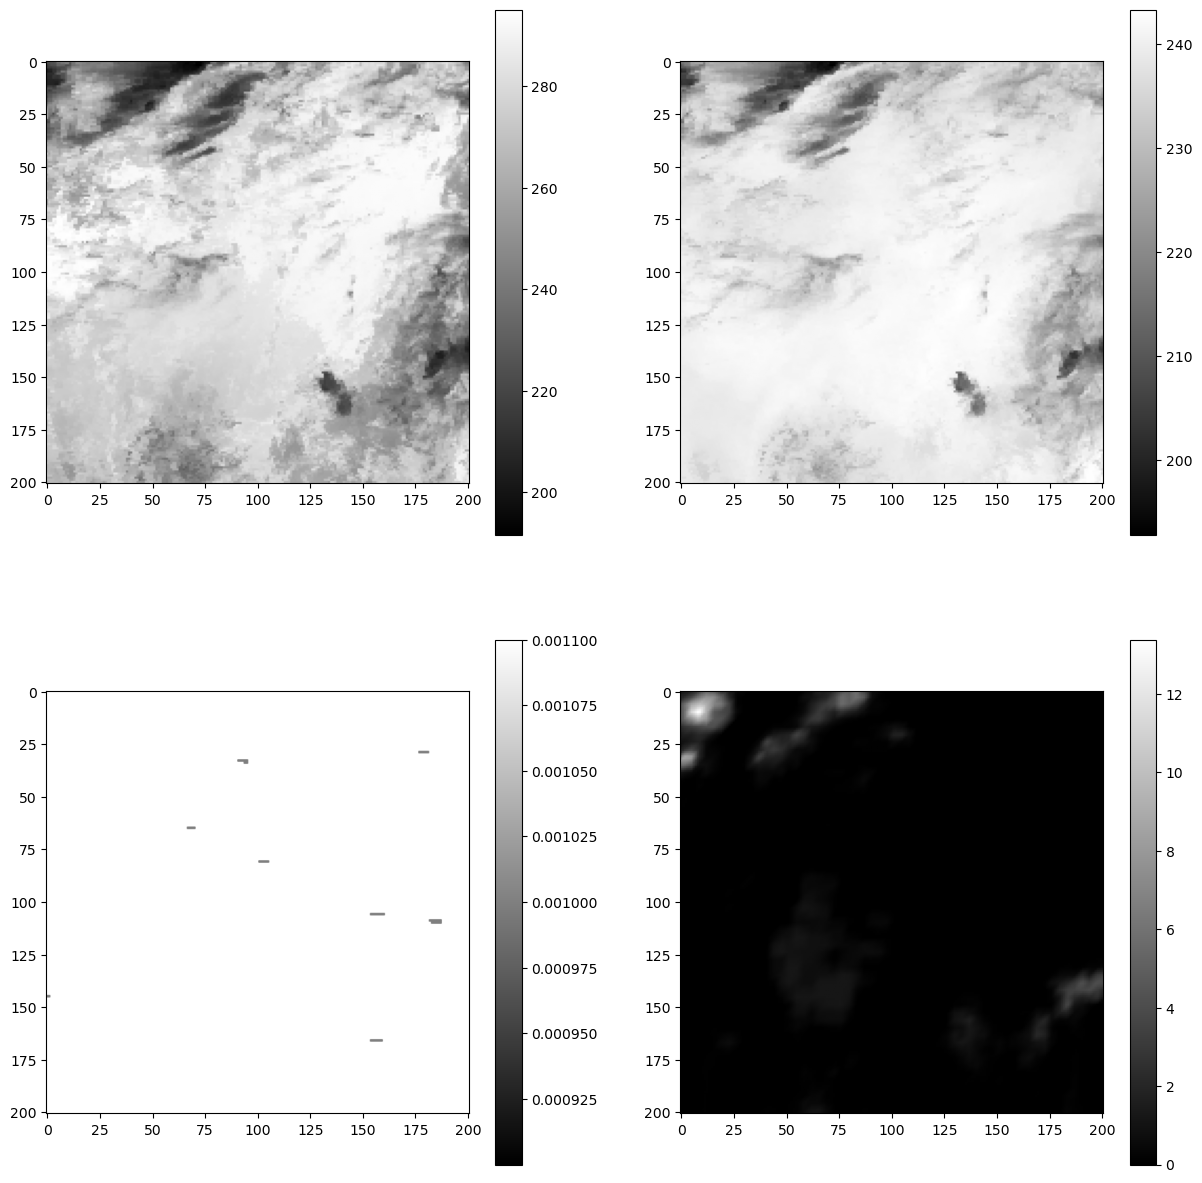

In [13]:
index=-1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))
img = data_matrix[index,:,:,0].copy()
pos = ax1.imshow(img, plt.cm.gray)
cbar = ax1.figure.colorbar(pos, ax=ax1)

img1 = data_matrix[index,:,:,1].copy()
pos1 = ax2.imshow(img1, plt.cm.gray)
cbar = ax2.figure.colorbar(pos1, ax=ax2)

img2 = data_matrix[index,:,:,2].copy()
pos2 = ax3.imshow(img2, plt.cm.gray)
cbar = ax3.figure.colorbar(pos2, ax=ax3)

img3 = data_matrix[index,:,:,3].copy()
pos3 = ax4.imshow(img3, plt.cm.gray)
cbar = ax4.figure.colorbar(pos3, ax=ax4)

## Data preprocessing

train_label，validate_label，test_label is the label 

train，validate，test is the data 

In [17]:
# 1. subtract the index and shuffle it. 
tc_id=data_label['ID'].drop_duplicates()

In [18]:
# 2. create a seed, and shuffle the tc_id 
seed=100
np.random.seed(seed)
perm = np.random.permutation(tc_id)

# 3. split the training set 
train_percent,validate_percent=0.6,0.2

m = len(tc_id.index)
train_end = int(train_percent * m)
validate_end = int(validate_percent * m) + train_end

In [19]:
#  the labels 
tmp=[] 
for i in range(train_end):
    tmp.append(data_label[data_label['ID']==perm[i]])
train_label=pd.concat(tmp)

tmp=[] 
for i in range(train_end,validate_end):
    tmp.append(data_label[data_label['ID']==perm[i]])
validate_label =pd.concat(tmp)

tmp=[] 
for i in range(validate_end,len(perm)):
    tmp.append(data_label[data_label['ID']==perm[i]])
test_label =pd.concat(tmp)

In [20]:
# split the data 
length=len(test_label.index)
tmp=np.empty(shape=[length,201,201,4])
for i in range(length):
    tmp[i,:,:,:]=data[test_label.index[i]]
    
length=len(train_label.index)
train=np.empty(shape=[length,201,201,4])
for i in range(length):
    train[i,:,:,:]=data[train_label.index[i]]

length=len(validate_label.index)
validate=np.empty(shape=[length,201,201,4])
for i in range(length):
    validate[i,:,:,:]=data[validate_label.index[i]]  

In [21]:
# def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
#     np.random.seed(seed)
#     perm = np.random.permutation(df.index)
#     m = len(df.index)
#     train_end = int(train_percent * m)
#     validate_end = int(validate_percent * m) + train_end
#     train = df.iloc[perm[:train_end]]
#     validate = df.iloc[perm[train_end:validate_end]]
#     test = df.iloc[perm[validate_end:]]
#     return train, validate, test